In [1]:
pip install pytrends matplotlib pandas seaborn plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt	
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq


# setup pytrends library and keyword list 

In [3]:
pydrends = TrendReq(hl='en-US', tz=360)
keywords=" DATA SCIENCE"

# Data request

In [4]:
import time

# Increase sleep time and add retry logic
success = False
attempts = 0
while not success and attempts < 5:
	try:
		pydrends.build_payload([keywords], cat=0, timeframe='today 12-m', geo='', gprop='')
		success = True
	except Exception as e:
		print(f"Attempt {attempts+1}: {e}. Retrying after 120 seconds...")
		time.sleep(120)
		attempts += 1
if not success:
	raise Exception("Failed to build payload after multiple attempts due to TooManyRequestsError.")

# Country Wise Interest

In [5]:
region_data=pydrends.interest_by_region()
region_data=region_data.sort_values(by=keywords, ascending=False).head(15)

C:\Users\amank\AppData\Local\Temp\ipykernel_3984\933809993.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keywords], y=region_data.index, palette='Blues')


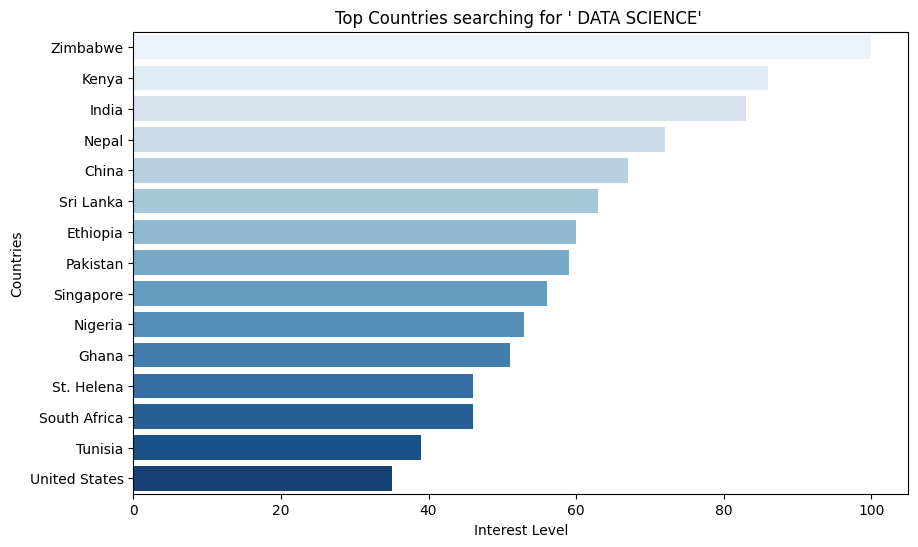

In [6]:
region_data = pydrends.interest_by_region()
region_data = region_data.sort_values(by=keywords, ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keywords], y=region_data.index, palette='Blues')
plt.title(f"Top Countries searching for '{keywords}' ")
plt.xlabel('Interest Level')
plt.ylabel('Countries')
plt.show()

# World Map

In [7]:
region_data = region_data.reset_index()
region_data = region_data.rename(columns={'index': 'geoName'})
fig = px.choropleth(
	region_data,
	locations='geoName',
	locationmode='country names',
	color=keywords,
	title=f"Search Interest for '{keywords}' by Country",
	color_continuous_scale='Blues'
)
fig.show()

C:\Users\amank\AppData\Local\Temp\ipykernel_3984\3886145416.py:3: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


# Time Wise Interest

In [8]:
import time

# Retry logic for interest_over_time
success = False
attempts = 0
while not success and attempts < 5:
	try:
		time_df = pydrends.interest_over_time()
		success = True
	except Exception as e:
		print(f"Attempt {attempts+1}: {e}. Retrying after 120 seconds...")
		time.sleep(120)
		attempts += 1
if not success:
	raise Exception("Failed to fetch time_df after multiple attempts due to ConnectionError.")

c:\Users\amank\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



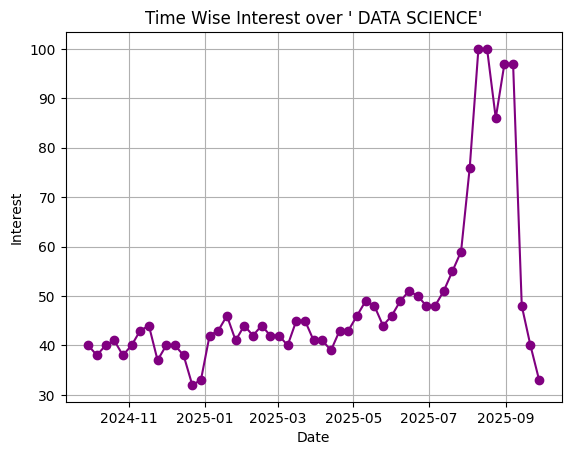

In [9]:
# Ensure time_df is defined
if 'time_df' not in globals():
	time_df = pydrends.interest_over_time()

plt.Figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keywords], marker='o', color='purple')
plt.title(f"Time Wise Interest over '{keywords}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple Keywords Compare

In [10]:
from pytrends.request import TrendReq

kw_list = ["cloud computing", "data science", "machine learning"]

# Ensure pydrends is defined
if 'pydrends' not in globals():
	pydrends = TrendReq(hl='en-US', tz=360)

import time

# Add retry logic to handle TooManyRequestsError
success = False
attempts = 0
while not success and attempts < 5:
	try:
		pydrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')
		success = True
	except Exception as e:
		print(f"Attempt {attempts+1}: {e}. Retrying after 120 seconds...")
		time.sleep(120)
		attempts += 1
if not success:
	raise Exception("Failed to build payload after multiple attempts due to TooManyRequestsError.")

c:\Users\amank\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



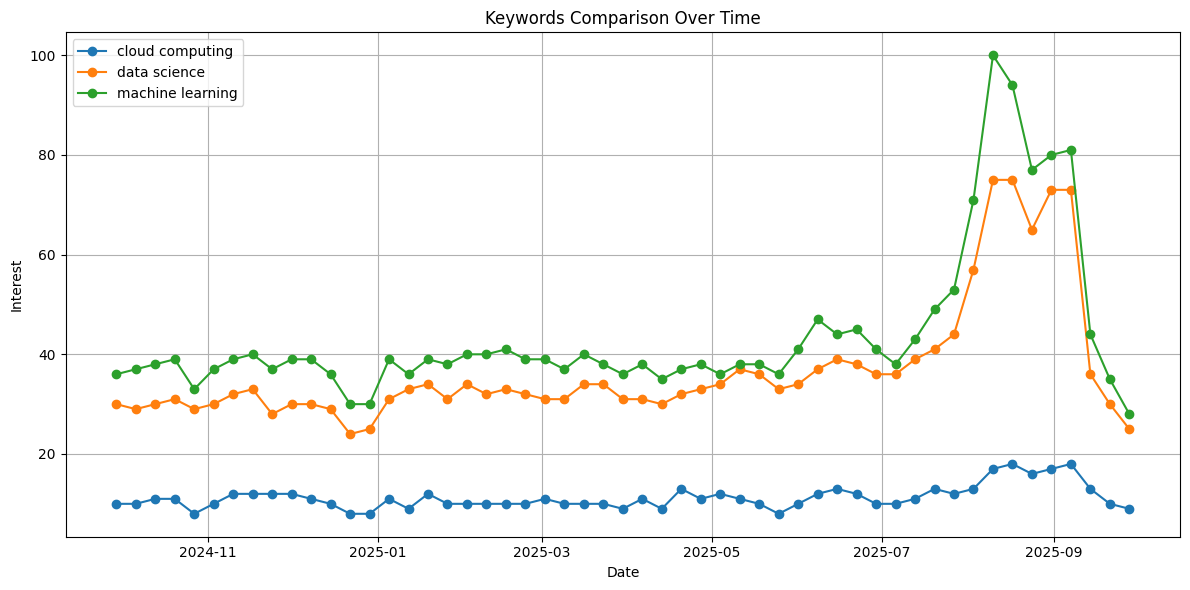

In [11]:
import matplotlib.pyplot as plt

# Ensure kw_list is defined
kw_list = ["cloud computing", "data science", "machine learning"]

# Ensure pydrends is defined
if 'pydrends' not in globals():
	from pytrends.request import TrendReq
	pydrends = TrendReq(hl='en-US', tz=360)

# Build payload with kw_list before fetching interest_over_time
pydrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')
compare_df = pydrends.interest_over_time()

# Remove 'isPartial' column if present
if 'isPartial' in compare_df.columns:
	compare_df = compare_df.drop(columns=['isPartial'])

# Check if all keywords are present in the DataFrame columns
missing_keywords = [kw for kw in kw_list if kw not in compare_df.columns]
if missing_keywords:
	raise KeyError(f"Missing keyword columns in DataFrame: {missing_keywords}")

plt.figure(figsize=(12,6))
for kw in kw_list:
	plt.plot(compare_df.index, compare_df[kw], marker='o', label=kw)
plt.title("Keywords Comparison Over Time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()